In [40]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [41]:
print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)

(8982,)
(2246,)
(8982,)
(2246,)


In [42]:
import numpy as np

lengths = [len(x) for x in train_data]
print("TrainData Length:",len(lengths))
print("TrainData Min:",min(lengths))
print("TrainData Max:",max(lengths))
print("TrainData Mean:",np.mean(lengths))
print("TrainData StD:",np.std(lengths))

print("TrainLabels:",train_labels)
print("TrainLabels Min:",train_labels.min(0))

TrainData Length: 8982
TrainData Min: 13
TrainData Max: 2376
TrainData Mean: 145.5398574927633
TrainData StD: 145.81413013409278
TrainLabels: [ 3  4  3 ... 25  3 25]
TrainLabels Min: 0


In [43]:
word_index = reuters.get_word_index()

In [44]:
print(type(word_index))
print(len(word_index))
#print(word_index)

<class 'dict'>
30979


In [45]:
reverse_word_index = dict(
    [(value,key) for (key, value) in word_index.items()]
)

idx = 4
label = train_labels[idx]
review = train_data[idx]
decoded_review = " ".join(
    [reverse_word_index.get(index - 3, "?") for index in review]
)
print(label)
print(decoded_review)

4
? seton co said its board has received a proposal from chairman and chief executive officer philip d ? to acquire seton for 15 75 dlrs per share in cash seton said the acquisition bid is subject to ? arranging the necessary financing it said he intends to ask other members of senior management to participate the company said ? owns 30 pct of seton stock and other management members another 7 5 pct seton said it has formed an independent board committee to consider the offer and has deferred the annual meeting it had scheduled for march 31 reuter 3


In [46]:
from keras.utils import to_categorical

print("Before:",train_labels[1])
train_labels = to_categorical(train_labels)
test_labes = to_categorical(test_labels)
print("After:",train_labels[1])

Before: 4
After: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [47]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros([len(sequences),dimension]) #matrix with only 0s, each row is a sequence
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0; #fancy indexing
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [48]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(
    1000, 
    activation="relu",
    input_shape=(10000,)))
#model.add(layers.Dense(138,activation="relu"))
model.add(layers.Dense(46, activation="softmax"))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1000)              10001000  
_________________________________________________________________
dense_10 (Dense)             (None, 46)                46046     
Total params: 10,047,046
Trainable params: 10,047,046
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(
    optimizer="rmsprop", #always a good start
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [50]:
#split you training data into a validation set (10k) and an actual training set (15k)
anz = 1500

x_val = x_train[:anz]
partial_x_train = x_train[anz:]


print(train_labels)

y_val = train_labels[:anz]
partial_y_train = train_labels[anz:]
print(x_val.shape)
print(y_val.shape)

print(partial_x_train.shape)
print(partial_y_train.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(1500, 10000)
(1500, 46)
(7482, 10000)
(7482, 46)


In [51]:
history = model.fit(
    partial_x_train, partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Train on 7482 samples, validate on 1500 samples
Epoch 1/20
7482/7482 [==============================] - 3s 387us/step - loss: 1.6302 - acc: 0.6476 - val_loss: 1.0767 - val_acc: 0.7593
Epoch 2/20
7482/7482 [==============================] - 2s 315us/step - loss: 0.5999 - acc: 0.8742 - val_loss: 0.9124 - val_acc: 0.8067
Epoch 3/20
7482/7482 [==============================] - 2s 318us/step - loss: 0.3496 - acc: 0.9270 - val_loss: 0.9074 - val_acc: 0.8127
Epoch 4/20
7482/7482 [==============================] - 2s 317us/step - loss: 0.2408 - acc: 0.9453 - val_loss: 0.9083 - val_acc: 0.8093
Epoch 5/20
7482/7482 [==============================] - 2s 320us/step - loss: 0.1958 - acc: 0.9530 - val_loss: 0.9248 - val_acc: 0.8133
Epoch 6/20
7482/7482 [==============================] - 2s 315us/step - loss: 0.1707 - acc: 0.9530 - val_loss: 0.9891 - val_acc: 0.7920
Epoch 7/20
7482/7482 [==============================] - 3s 341us/step - loss: 0.1545 - acc: 0.9566 - val_loss: 1.0396 - val_acc: 0.7913


available keys: dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


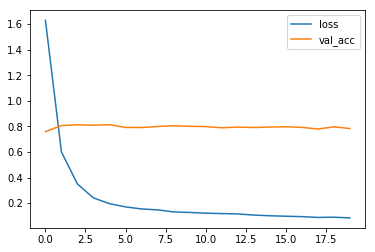

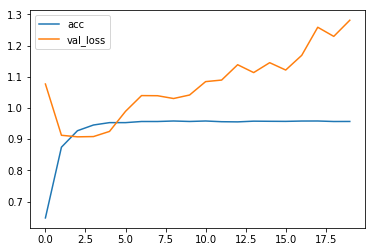

In [52]:
import matplotlib.pyplot as plt

print("available keys:",history.history.keys())
#r = range(1, len(history.history["binary_accuracy"]) + 1)

plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_acc"], label="val_acc")
plt.legend()
plt.show()
plt.close()

plt.plot(history.history["acc"], label="acc")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()
plt.close()